# Comparison of various estimators for the variance of populations with normal or uniform distribution

Compare the following four estimators for the variance of two populations distributed as N(0, 1) and U(0, 1)

$$ \tilde{\sigma}^2=\frac{1}{n+k}\sum_{i=1}^n(x_i-\tilde{\mu})^2$$ with $k=-1,0,+1,+2$

The population mean µ should be also estimated from the sample mean via $\tilde{\mu}=\frac{1}{n}\sum_{i=1}^nx_i$

Use (n = 5) and (100000 realizations); the R-functions _matrix(), rowSums(), colSums(), rowMeans(), colMeans()_ are your friends

* How big is the bias of the estimators? Is there an unbiased estimator among them? 
* Which estimator is most efficient? 
* Which estimator would you choose to estimate the population variance?

In [ ]:
# false understanding of n and realizations
xi <- rnorm(100000)
# xi <- runif(100000)
n <- length(xi)
mu <- sum(xi)/n
sigma_n1 <- sum((xi-mu)^2)/(n-1)
sigma_n1
sigma_0 <- sum((xi-mu)^2)/n
sigma_0
sigma_1 <- sum((xi-mu)^2)/(n+1)
sigma_1
sigma_2 <- sum((xi-mu)^2)/(n+2)
sigma_2

In [1]:
varplus <- function(x,plus) {
  # x is a matrix
  n <- as.double(dim(x)[2])
  d <- rowSums((x-rowMeans(x))^2)/(n+plus) # R "recycles" vectors
  return(d)
}

nrow = 100000
ncol = 5

# Uniformly distributed random sample in [0,1]
a <- matrix(runif(nrow*ncol),nrow,ncol) ; v0 <- 1.0/12.0
# Gaussian random samples with zero mean and variance 1
#a <- matrix(rnorm(nrow*ncol),nrow,ncol) ; v0 <- 1.0

cat("Bias of variance estimator", "\n")
cat("==========================", "\n")
cat("Bias with n+2: ", mean(varplus(a, 2.0))-v0, "\n")
cat("Bias with n+1: ", mean(varplus(a, 1.0))-v0, "\n")
cat("Bias with n  : ", mean(varplus(a, 0.0))-v0, "\n")
cat("Bias with n-1: ", mean(varplus(a,-1.0))-v0, "\n")
cat("\n")
cat("Efficiency of variance estimator", "\n")
cat("================================", "\n")
cat("MS deviation with n+2: ", mean((varplus(a, 2.0)-v0)^2), "\n")
cat("MS deviation with n+1: ", mean((varplus(a, 1.0)-v0)^2), "\n")
cat("MS deviation with n  : ", mean((varplus(a, 0.0)-v0)^2), "\n")
cat("MS deviation with n-1: ", mean((varplus(a,-1.0)-v0)^2), "\n")

Bias of variance estimator 
Bias with n+2:  -0.03573032 
Bias with n+1:  -0.02779648 
Bias with n  :  -0.01668911 
Bias with n-1:  -2.805206e-05 

Efficiency of variance estimator 
MS deviation with n+2:  0.001867561 
MS deviation with n+1:  0.001576932 
MS deviation with n  :  0.001436701 
MS deviation with n-1:  0.001809649 


[1] 1.550029

[1] 0.0007136389

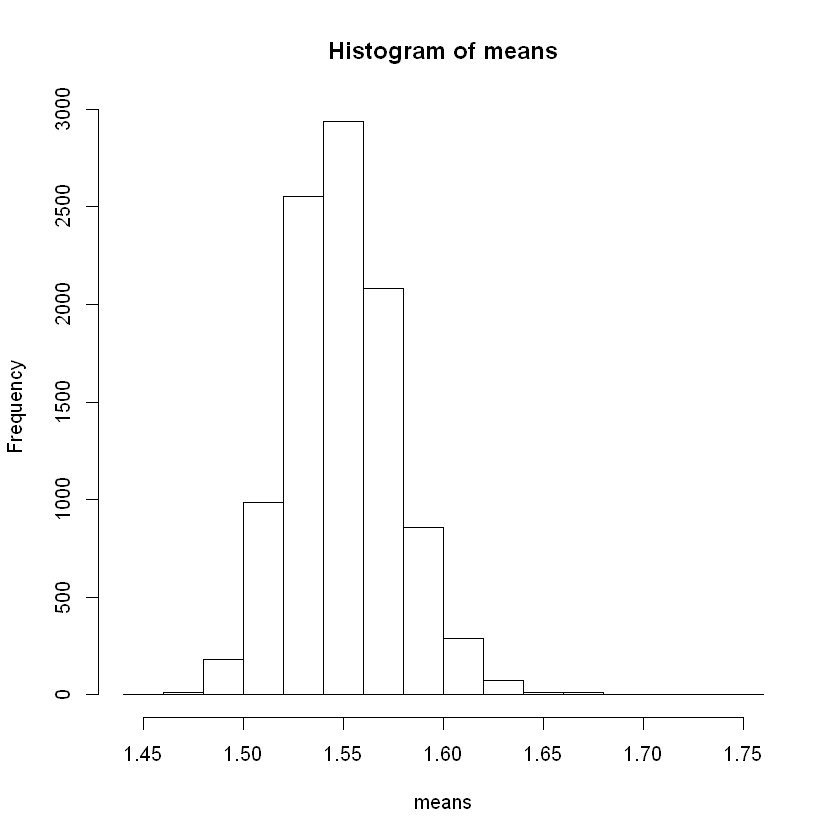

In [2]:
# MCexample1
fx <- function(x){
    return(x^(-1/3)+x/10)
}
t <- matrix(runif(1000*10000),1000,10000) # also use cheating, runif(n, 0.1e-20, 1) avoid potential division by 0
means <- colMeans(fx(t))
hist(means)
mean(means)
var(means)